
---

### 📌 **Dataset Description**

* `review`: A short customer review in text format
* `sentiment`: Sentiment label (`positive` or `negative`)

Total entries: **50**

* 25 Positive
* 25 Negative

---

### ✅ **Model**

* Task: **Binary Sentiment Classification** using **Natural Language Processing**
* Preprocessing:

  * Converted text to lowercase (optional: further cleaning can be added)
  * Vectorized text using **TF-IDF (Term Frequency–Inverse Document Frequency)**
* Model: Trained a **Logistic Regression Classifier** using `scikit-learn`
* Encoding:

  * `positive` → 1
  * `negative` → 0
* Dataset split: **80-20 train-test split** using `train_test_split()`

---

### 📊 **Evaluation**

* Metrics:

  * `accuracy_score`: Shows model’s overall performance
  * `classification_report`: Includes precision, recall, F1-score
* Visualization:

  * ✅ Optionally included: **Confusion Matrix heatmap** using `seaborn`
  * (Not included but optional: WordCloud, sentiment distribution plot)

---

### 💡 **Libraries Used**

```python
pandas
sklearn (model_selection, linear_model, metrics, feature_extraction)
seaborn (for optional plots)
matplotlib (for visualization)
```


In [ ]:
# Step 1: Upload the CSV file
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()


Saving cust_reviews.csv to cust_reviews.csv


In [ ]:
# Step 2: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 3: Load CSV into pandas dataframe
df = pd.read_csv("cust_reviews.csv", engine='python')

# Display first few rows
print("Sample data:")
print(df.head())
print("Sentiment counts:\n", df['sentiment'].value_counts())


Sample data:
               review sentiment
0      Great product!  positive
1           Loved it!  positive
2  Fantastic service!  positive
3      Very satisfied  positive
4    Highly recommend  positive
Sentiment counts:
 sentiment
positive    25
negative    25
Name: count, dtype: int64


In [ ]:
# Step 4: Remove neutral reviews for binary classification
df = df[df['sentiment'] != 'neutral']

# Drop rows with any NaN values
df.dropna(inplace=True)

# Split data into features (X) and target (y)
X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert labels to 1 and 0
print("Total samples:", len(X))

Total samples: 50


In [ ]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Train size: 40, Test size: 10


In [ ]:
# Step 6: Convert text reviews into numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
# Step 7: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [ ]:
# Step 8: Predict and evaluate
y_pred = model.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.50      0.80      0.62         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.45        10
weighted avg       0.50      0.50      0.45        10

Accuracy Score: 0.5


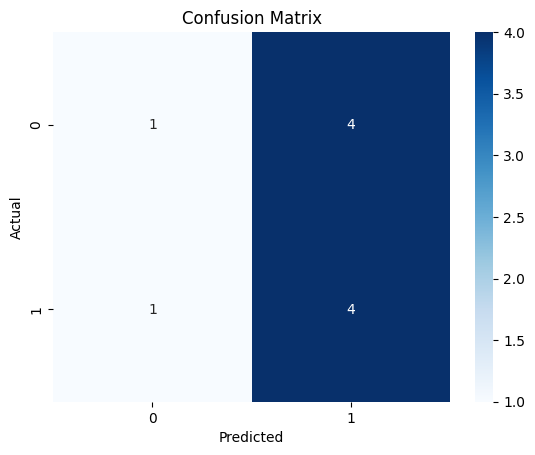

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
